# Computer Vision SS 2021
## Exercise Sheet 1: Imaging
### Erhardt Barth / Philipp Gruening / Christoph Linse / Manuel Laufer
Universität zu Lübeck, Institut für Neuro- und Bioinformatik

In case of questions, contact us via email: *{barth, gruening, linse, laufer} @inb.uni-luebeck.de*

## Note: Please insert the names of all participating students:

1. Onurcan Köken
2. Sazid Rahman Simanto
3. Mokrane Ouarezki
4. Muhammad Junaid 


In [ ]:
import sys, os
if 'google.colab' in sys.modules:
  if os.getcwd() == '/content':
    !git clone 'https://github.com/inb-luebeck/cs4250.git'
    os.chdir('cs4250')

Cloning into 'cs4250'...
remote: Enumerating objects: 78, done.
remote: Counting objects: 100% (78/78), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 78 (delta 28), reused 64 (delta 18), pack-reused 0
Unpacking objects: 100% (78/78), done.


In [4]:
import cv2 # open cv
import matplotlib.pyplot as plt # plotting tools
import numpy as np # matrix, array operations

from os.path import join # combine different items to a path
from os import getcwd, listdir # shows the current directory, lists items in a directory

# show plots when running cell
%matplotlib inline 

## Exercise 1.1
### Loading and displaying images in Python
Download the image `clown.png` from the website of the tutorial. Load
the image in Python via opencv (`cv2.imread`). By default the image is loaded as BGR (blue, green, red), convert the image to gray with `cv2.cvtColor`.
Display the image `plt.imshow`, use the colormap `gray`.

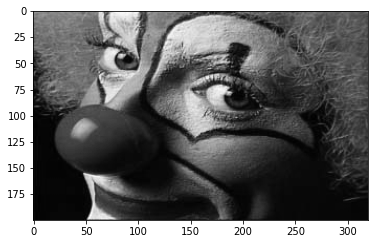

In [ ]:
# TODO: define image path
image_path = "/content/cs4250/data/exercise_1/clown.png"
# TODO: read image
image = cv2.imread(image_path)
# TODO: convert image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# TODO: display image
plt.imshow(gray_image, cmap='gray')

## Exercise 1.2
### Image gradients
Images are stored as `numpy arrays`, for further computations convert the array to range $[0, 1]$ (`astype`). Define a function `load_gray_normalized` that loads the image, converts it to grayscale and normalizes it.
Compute the image gradients $d_x$ and $d_y$ for the image from the previous assignment. Initialize a simple gradient kernel like $[-1, 0, +1]$ for $d_x$ (`np.zeros`, `np.array`) and filter the image with it (`cv2.filter2D`). Visualize the results using `plt.imshow`. To this end, display the resulting images of both derivatives along `x` and `y` in a single figure (`plt.subplots`).

What do you need to take care of, to be able to visually **compare** the results?
Hint: the problem is related to the range of the pixel values in the two 
gradient images. Name the problem and propose a solution to it by using the options of the `plt.imshow`
function. 

We need to take care of the pixel ranges (minimum and maximum) of the filtered two gradient images. To be able to compare the results, min and max of these two gradient images are supposed to be the same. Imagine one of the image range is 0m to 5m, and the other is 2m to 10m, so to be able to compare these 2, we need to get min and max so that we can map them to 0m to 10m and we will be able to compare them.

In [ ]:
def load_gray_normalized(image_path):
    # load image
    image = cv2.imread(image_path)
    # convert image BGR to GRAY
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # convert image to array
    array_img = gray_image.astype(np.float32)
    # normalize image
    norm_array_img = array_img / 255.

    return norm_array_img

-0.77254903 0.9411765


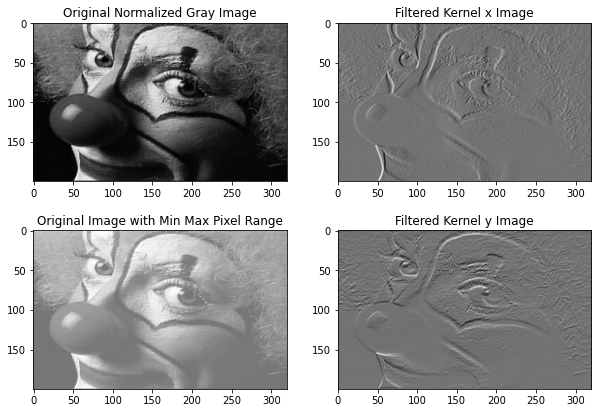

In [ ]:
# TODO: load image
normalized_img = load_gray_normalized(image_path)
# TODO: define kernels
gradient_kernel_x = np.expand_dims(np.array([-1,0,+1]), 0)    # (1, 3) shape, to detect vertical
gradient_kernel_y = np.expand_dims(np.array([-1,0,+1]), -1)   # (3, 1) shape, to detect horizontal
# TODO: filter images
# create your own linear filter by cv2.filter2D, the correlation is calculated
# depth -1: depth is the same as the source
filtered_img_x = cv2.filter2D(src=normalized_img, ddepth=-1, kernel=gradient_kernel_x)
filtered_img_y = cv2.filter2D(src=normalized_img, ddepth=-1, kernel=gradient_kernel_y) 
# adjust the range of pixels
min_pixel = min(filtered_img_x.min(), filtered_img_y.min())
max_pixel = max(filtered_img_x.max(), filtered_img_y.max())
print(min_pixel, max_pixel)
# TODO: display images
plt.subplots(figsize=(10, 7))

plt.subplot(2,2,1)
plt.imshow(normalized_img, cmap='gray')
plt.title("Original Normalized Gray Image")

plt.subplot(2,2,2)
plt.imshow(filtered_img_x, cmap='gray', vmin=min_pixel, vmax=max_pixel)
plt.title("Filtered Kernel x Image")

plt.subplot(2,2,3)
plt.imshow(normalized_img, cmap='gray', vmin=min_pixel, vmax=max_pixel)
plt.title("Original Image with Min Max Pixel Range")

plt.subplot(2,2,4)
plt.imshow(filtered_img_y, cmap='gray', vmin=min_pixel, vmax=max_pixel)
plt.title("Filtered Kernel y Image")

plt.show()

## Exercise 1.3
### Point operations
Download from the website the images `ueb131.png` and `ueb132.png`, 
then load and display them.  
Both images illustrate two commonly encountered problems in photography. 
Underexposed (overexposed) images are darker (brighter) than they should be, 
because they have been exposed to too little (too much) light. 

Compute and display the histograms (`plt.hist`,`np.flatten`) of the images in range $[0,1]$. Write a function `display_with_hist` that creates two subplots, showing the image and the respective histogram.

Can you identify the exposure problems in the histograms?
Hint: look at how the pixel intensities are distributed. 

These defects can be corrected by remapping the pixel values to achieve a 
more evenly distributed range of pixel intensities. 
This can either be done by using histogram equalization (`cv2.equalizeHist`) or by using the logarithmic and power functions.

To use `cv2.equalizeHist`, the images need to be casted to uint8 in $[0,255]$. Write a function `normalized_to_uint8` to do this.

Apply the logarithmic and power to improve the two images. Experiment with different bases for the logarithm and power. To get a better feeling for the problem, plot the functions $x^2$ in $[0,1]$ and $log(x)$ in $[1,255]$ (why not $[0, 255]$?, `np.linspace, np.log, plt.plot`). **Where do the functions change quickly, where do they change slowly? How can you use this knowledge to improve the images?**

The logarithmic function is changing quickly for lower pixel values, and changing slowly for higher pixel values.
The quadratic function is changing quickly for higher pixel values, and changing slowly for lower pixel values.
The logarithmic function is better to use for darker images, where their pixels are generally too low. The quadratic function is better to use for brighter images, where their pixels are generally too high. 

In [ ]:
def display_with_hist(image):
    plt.subplots(figsize=(15, 5))
    plt.subplot(1,2,1), plt.imshow(image, cmap='gray'), plt.title("The Image")
    plt.subplot(1,2,2), plt.hist(image.flatten()), plt.title("Histogram")

In [ ]:
def normalized_to_uint8(image):
    img = 255 * image
    return img.astype(np.uint8)

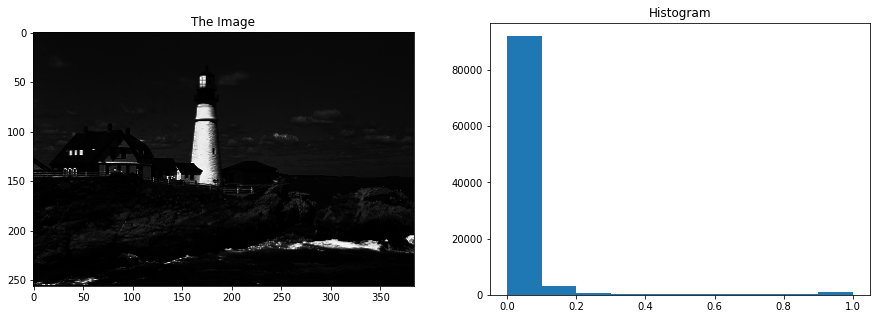

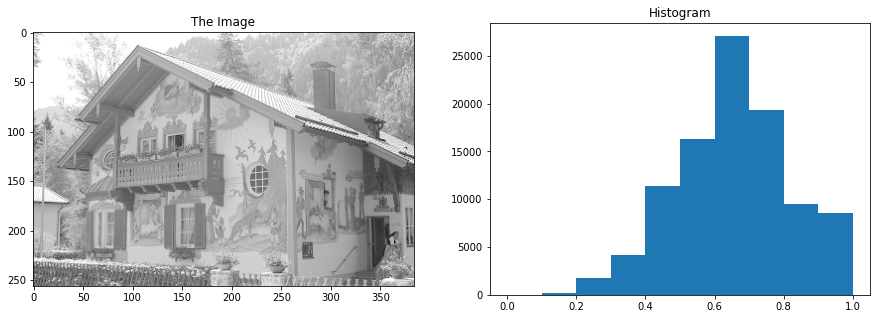

In [ ]:
# TODO: load images
img_1_path = "/content/cs4250/data/exercise_1/ueb131.png"
img_2_path = "/content/cs4250/data/exercise_1/ueb132.png"
img_1 = load_gray_normalized(img_1_path) # underexposed image, darker,   exposed to too little light
img_2 = load_gray_normalized(img_2_path) # overexposed  image, brighter, exposed to too much   light
# TODO: display images with histograms
display_with_hist(img_1)
display_with_hist(img_2)

We can identify the exposure problems in the histograms by looking to the pixel intensity distributions. For darker image the pixels are mostly between 0 to 0.2, which means the image contains too much dark pixels and the image is exposed to too little light. Also for the second image we can say it is brighter since the pixels are mostly higher than 0.6, which means the image is exposed to too much light.

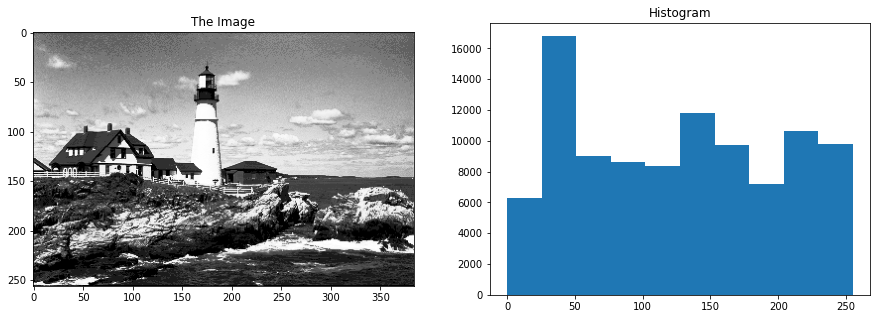

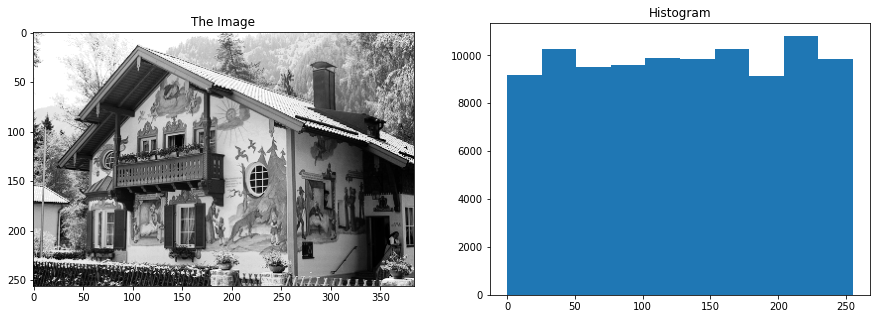

In [ ]:
# TODO: convert images to uint8
img_1_uint8 = normalized_to_uint8(img_1)
img_2_uint8 = normalized_to_uint8(img_2)
# TODO: equalize histogram and display
img_1_eqHist = cv2.equalizeHist(img_1_uint8)
img_2_eqHist = cv2.equalizeHist(img_2_uint8)
display_with_hist(img_1_eqHist)
display_with_hist(img_2_eqHist)

In the histograms above, what we see that the probabilities of each pixel are so near to each other, so the probability distribution of pixels is now uniform by using *equalizeHist()*.


(<matplotlib.axes._subplots.AxesSubplot at 0x7f03bab4b290>,
 Text(0.5, 1.0, 'Quadratic Function'))

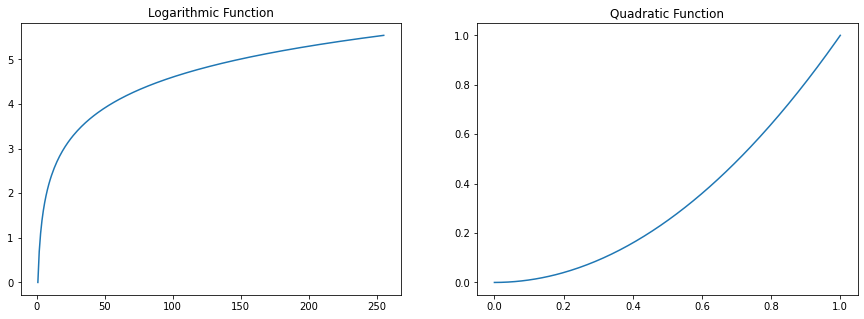

In [ ]:
# TODO: display logarithmic function
x = np.linspace(1, 255, num=255)
plt.subplots(figsize=(15, 5))
plt.subplot(1,2,1), plt.plot(x, np.log(x)), plt.title("Logarithmic Function")
# TODO: display quadratic function
q = np.linspace(0, 1, num=255)
plt.subplot(1,2,2), plt.plot(q, q**2), plt.title("Quadratic Function") 

What is happining in the figure above is that Logarithmic function is shrinking the distribution of high values pixels and in the density function, we are uniforming from left sided density to uniform distribution by normalizing. Same for quadratic function, the probability curve shrinks for lower pixel values and the probebility density goes from higher pixels to lower by normalizing.

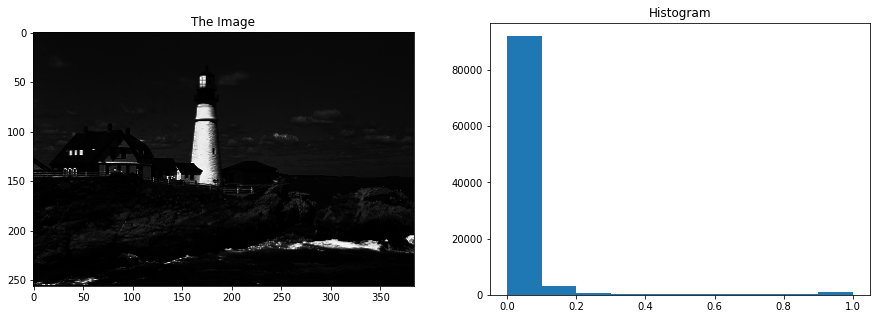

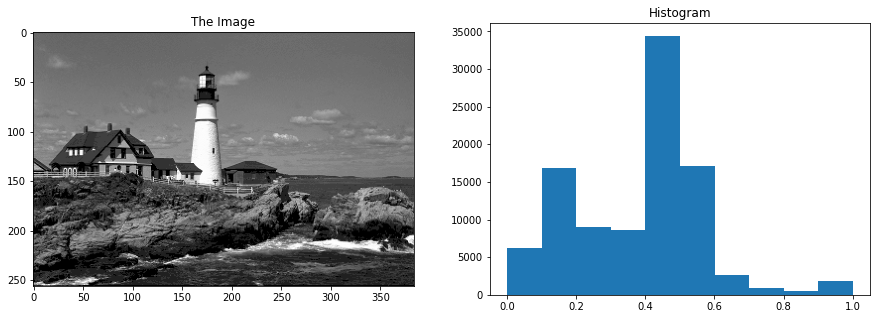

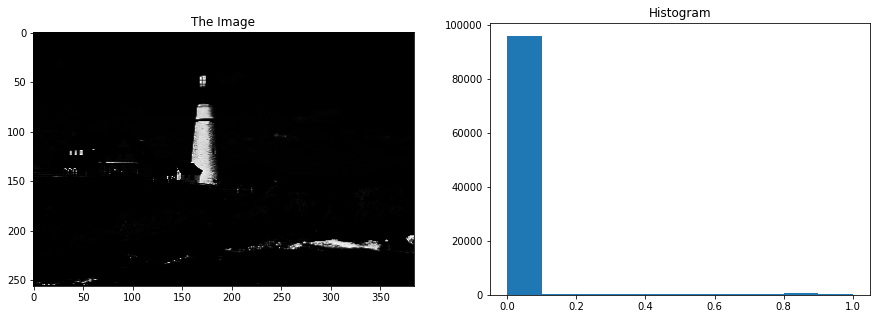

In [ ]:
# TODO: transform and display ueb131.png
display_with_hist(img_1)
# apply logarithmic function
img_1_log = np.log(1 + (img_1*255))
img_1_log /= np.log(255)
display_with_hist(img_1_log)
# apply quadratic function
display_with_hist(img_1**2)

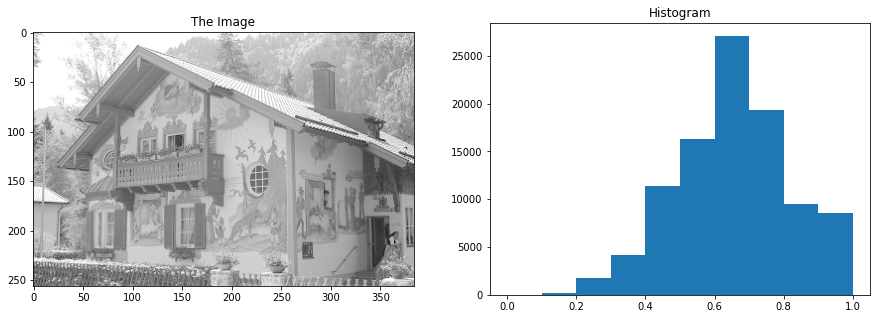

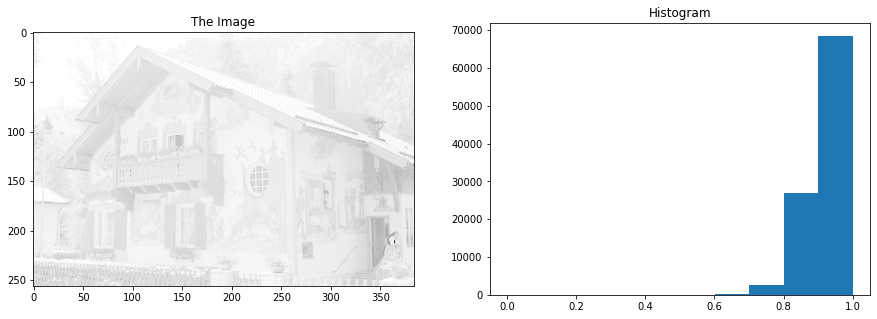

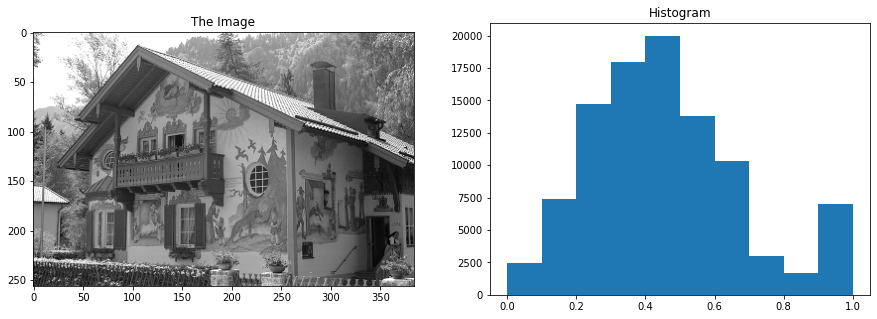

In [ ]:
# TODO: transform and display ueb132.png
display_with_hist(img_2)
# apply logarithmic function
img_2_log = np.log(1 + (img_2*255))
img_2_log /= np.log(255)
display_with_hist(img_2_log)
# apply quadratic function
display_with_hist(img_2**2)